# Key vs Popularity

I want to investigate the correlation between the popularity of a song and the key its in.

Before we investigate its worth explaining how the dataset uses key.

In the dataset, key is a numerical value from 0-11, where each number refers to a musical key, with 0 being C, and working its way up from there, wrapping around to A after G# and ending with B.

## EDA

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Import dataset
df = pd.read_csv('tracks.csv')
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [10]:
df.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


No columns need to be removed.

In [11]:
# Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1500 non-null   int64  
 1   duration_ms       1500 non-null   int64  
 2   explicit          1500 non-null   bool   
 3   danceability      1500 non-null   float64
 4   energy            1500 non-null   float64
 5   key               1500 non-null   int64  
 6   loudness          1500 non-null   float64
 7   mode              1500 non-null   int64  
 8   speechiness       1500 non-null   float64
 9   acousticness      1500 non-null   float64
 10  instrumentalness  1500 non-null   float64
 11  liveness          1500 non-null   float64
 12  valence           1500 non-null   float64
 13  tempo             1500 non-null   float64
 14  time_signature    1500 non-null   int64  
 15  track_genre       1500 non-null   object 
dtypes: bool(1), float64(9), int64(5), object(1

In [12]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [13]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


Next we can check for outliers

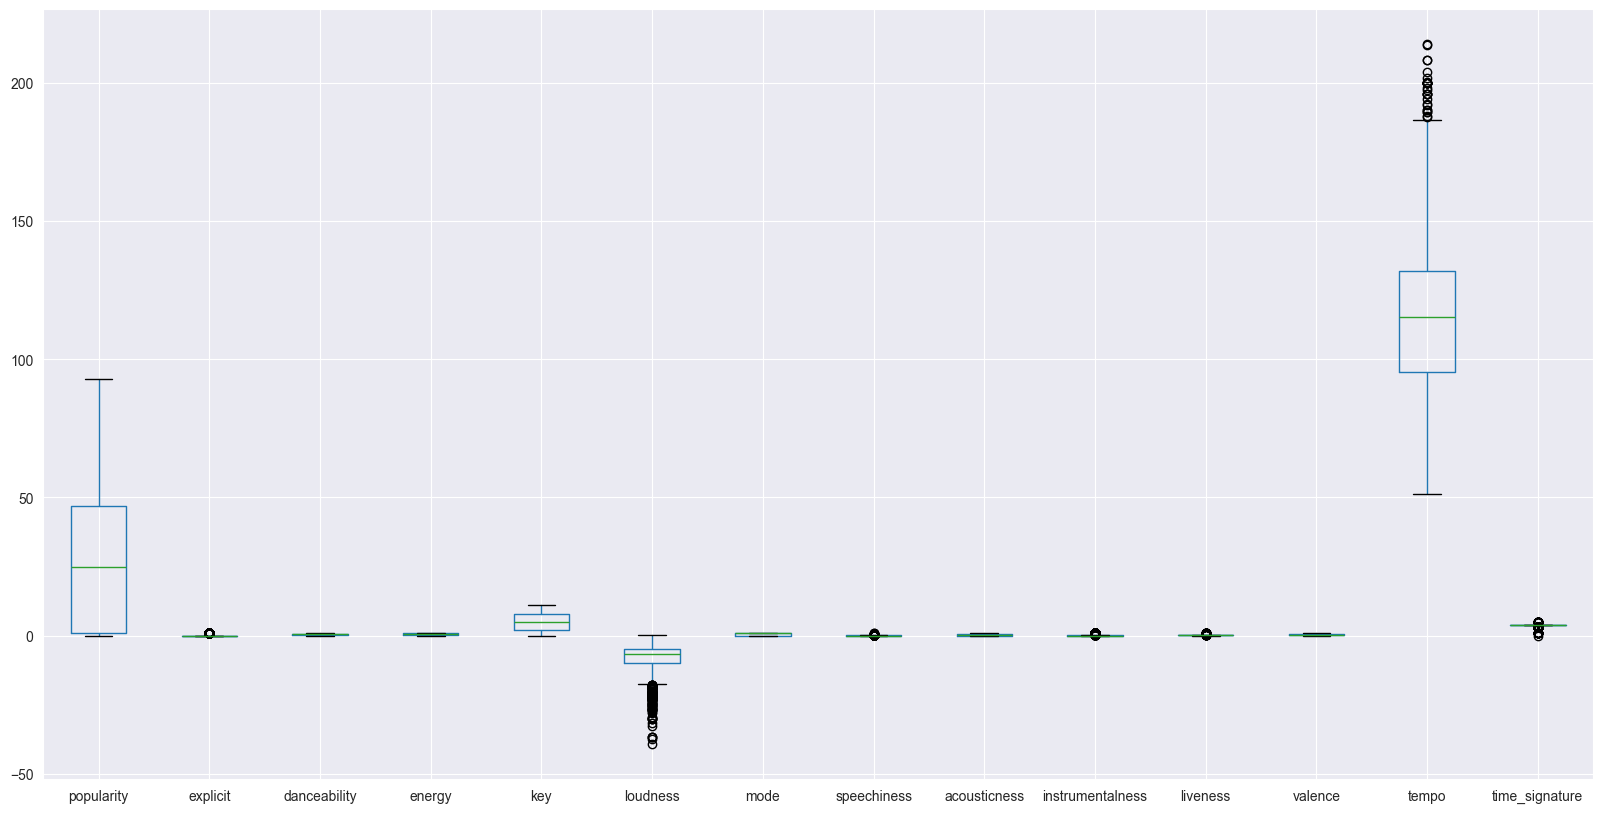

In [14]:

# Dropping 'duration_ms' since the mean is 209746 which would significantly sk  ew the graph.
df.drop(columns='duration_ms').boxplot(figsize=(20, 10))
plt.show()

The following columns contain outliers:  
`explicit`- which doesnt count as its binary  
`loudness`  
`speechiness`  
`instrumentalness`  
`liveness`  
`tempo`  
`time signature`

`loudness` and `tempo` contain some extreme outliers, suggesting the presence of both quiet, and quick songs.

In [15]:
df.skew(numeric_only=True).sort_values(ascending=False)


speechiness         3.467505
explicit            2.585422
liveness            2.343645
duration_ms         2.230314
instrumentalness    1.580077
acousticness        0.657867
tempo               0.594090
valence             0.418549
popularity          0.399054
key                 0.156664
danceability       -0.272588
energy             -0.545246
mode               -0.648124
loudness           -1.901944
time_signature     -3.312858
dtype: float64

Anything between 1 and -1 is considered not skewed.  

We can see that the following are right skewed:  
`speechiness`  
`explicit`  
`liveness`  
`duration_ms`  
`instrumentalness`  

And the following are left skewed:  
`loudness`  
`time_signature`  

Everything else is considered symetric.

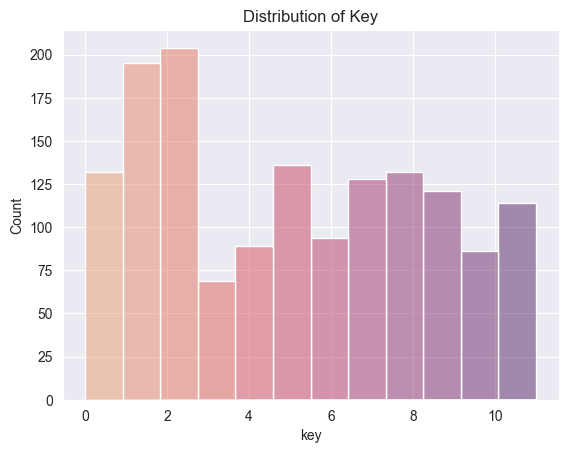

In [16]:
colours = sns.color_palette('flare', 12)
sns.histplot(data=df, x='key', bins=12, palette=colours, hue='key', legend=False)
plt.title("Distribution of Key")
plt.show()

Most common keys are 1 (C#), and 2 (D).  
Least common key is 3 (D#) with 4 (E), 6 (F#), and 10 (A#).  
The rest of the keys are fairly even.

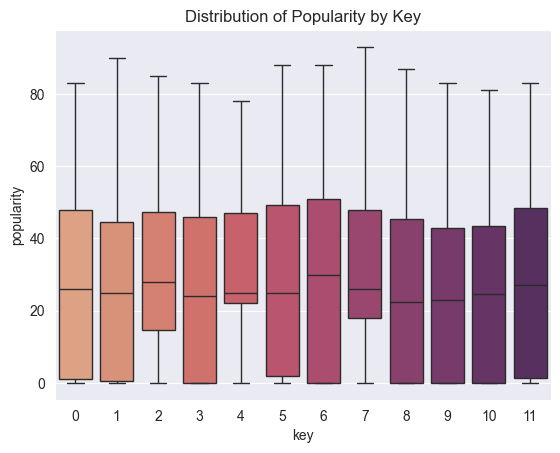

In [17]:
colours = sns.color_palette('flare', 12)
sns.boxplot(data=df, x='key', y='popularity', palette=colours, hue='key', legend=False)
plt.title("Distribution of Popularity by Key")
plt.show()

The median for all keys is pretty consistent across all keys.  
All keys have outliers.  
2 (D), 4 (E), and 7 (G) all have a tightly packed 25-50% percentile.

### Further exploring
We can also factor in genres to see if that plays a factor in the songs popularity from key. Certain genres might use different keys, lets use the 8 most popular genres


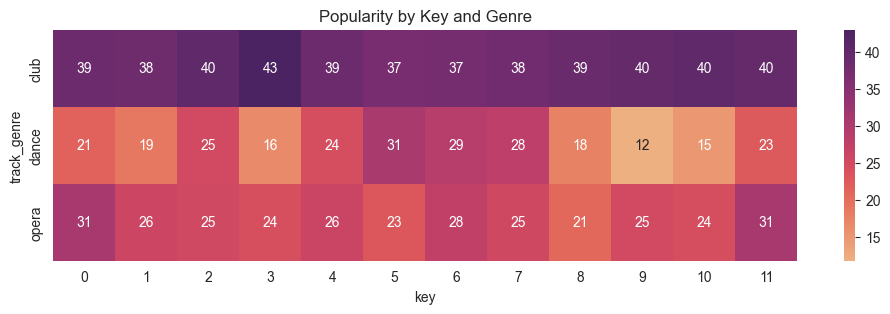

In [18]:
colours = sns.color_palette('flare', as_cmap=True)
plt.figure(figsize=(12, 3))
map = df.pivot_table(columns='key', index='track_genre', values='popularity', aggfunc='mean')
sns.heatmap(map, cmap=colours, annot=True)
plt.title("Popularity by Key and Genre")
plt.show()

`club` is the most popular genre, for all keys.  
While `opera` is more popular than `dance`, they are similar in several keys, such as 2 (D), 4 (E), 6 (F#), and 7 (G).  

`club` is also very consistent across all keys, having ~40 in each key.  
`opera` is fairly consistent at ~25.  
`dance` seems to be a lot less consistent, ranging from 12-31.  

Interestingly, key 3 (D#), which is the highest value for `club` (and the highest value on the graph), is on the lower side of values for `dance` and `opera`.

# Music Attributes vs Popularity Analysis

This exploratory data analysis investigates various musical attributes and how they correlate with song popularity. We'll examine multiple features to discover patterns and trends that might influence a song's popularity.

## Initial Setup and Data Loading


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [20]:
df = pd.read_csv('tracks.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1500, 16)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1500 non-null   int64  
 1   duration_ms       1500 non-null   int64  
 2   explicit          1500 non-null   bool   
 3   danceability      1500 non-null   float64
 4   energy            1500 non-null   float64
 5   key               1500 non-null   int64  
 6   loudness          1500 non-null   float64
 7   mode              1500 non-null   int64  
 8   speechiness       1500 non-null   float64
 9   acousticness      1500 non-null   float64
 10  instrumentalness  1500 non-null   float64
 11  liveness          1500 non-null   float64
 12  valence           1500 non-null   float64
 13  tempo             1500 non-null   float64
 14  time_signature    1500 non-null   int64  
 15  track_genre       1500 non-null   object 
dtypes: bool(1), float64(9), int64(5), object(1

In [22]:
df.skew(numeric_only=True).sort_values(ascending=False)

speechiness         3.467505
explicit            2.585422
liveness            2.343645
duration_ms         2.230314
instrumentalness    1.580077
acousticness        0.657867
tempo               0.594090
valence             0.418549
popularity          0.399054
key                 0.156664
danceability       -0.272588
energy             -0.545246
mode               -0.648124
loudness           -1.901944
time_signature     -3.312858
dtype: float64

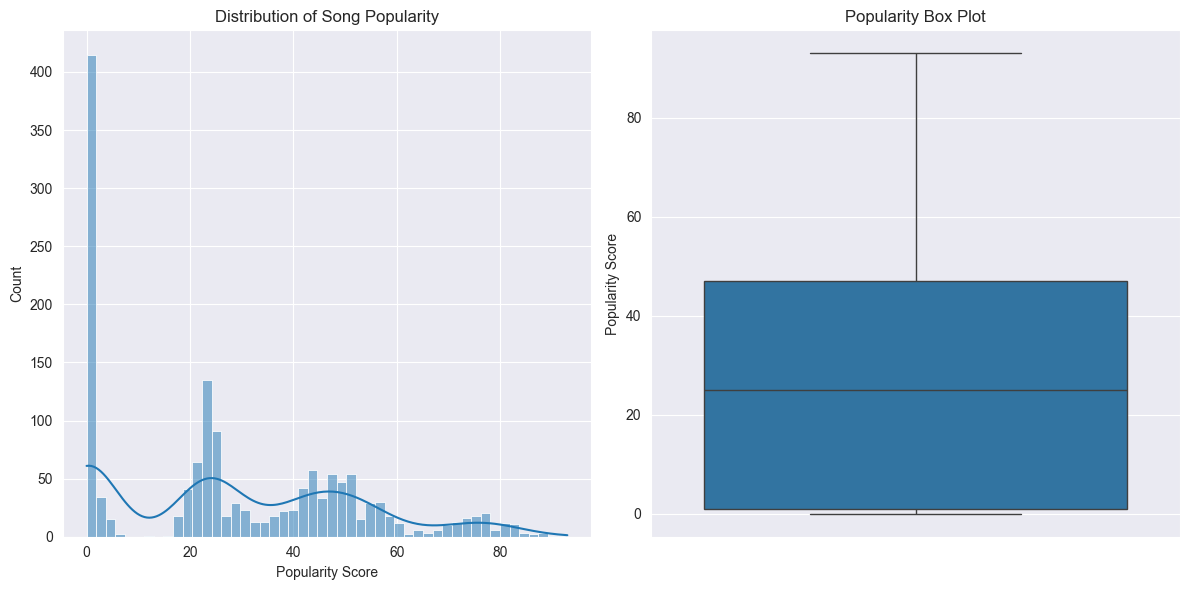

Average popularity: 28.55
Median popularity: 25.00
Standard deviation: 24.04


In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['popularity'])
plt.title('Popularity Box Plot')
plt.ylabel('Popularity Score')
plt.tight_layout()
plt.show()

# Basic statistics
print(f"Average popularity: {df['popularity'].mean():.2f}")
print(f"Median popularity: {df['popularity'].median():.2f}")
print(f"Standard deviation: {df['popularity'].std():.2f}")

We can see from this graph that theres a general popularity trend, with most songs being between 0-50. There are a few outliers, but they are not significant enough to skew the data.


## Musical Features vs Popularity


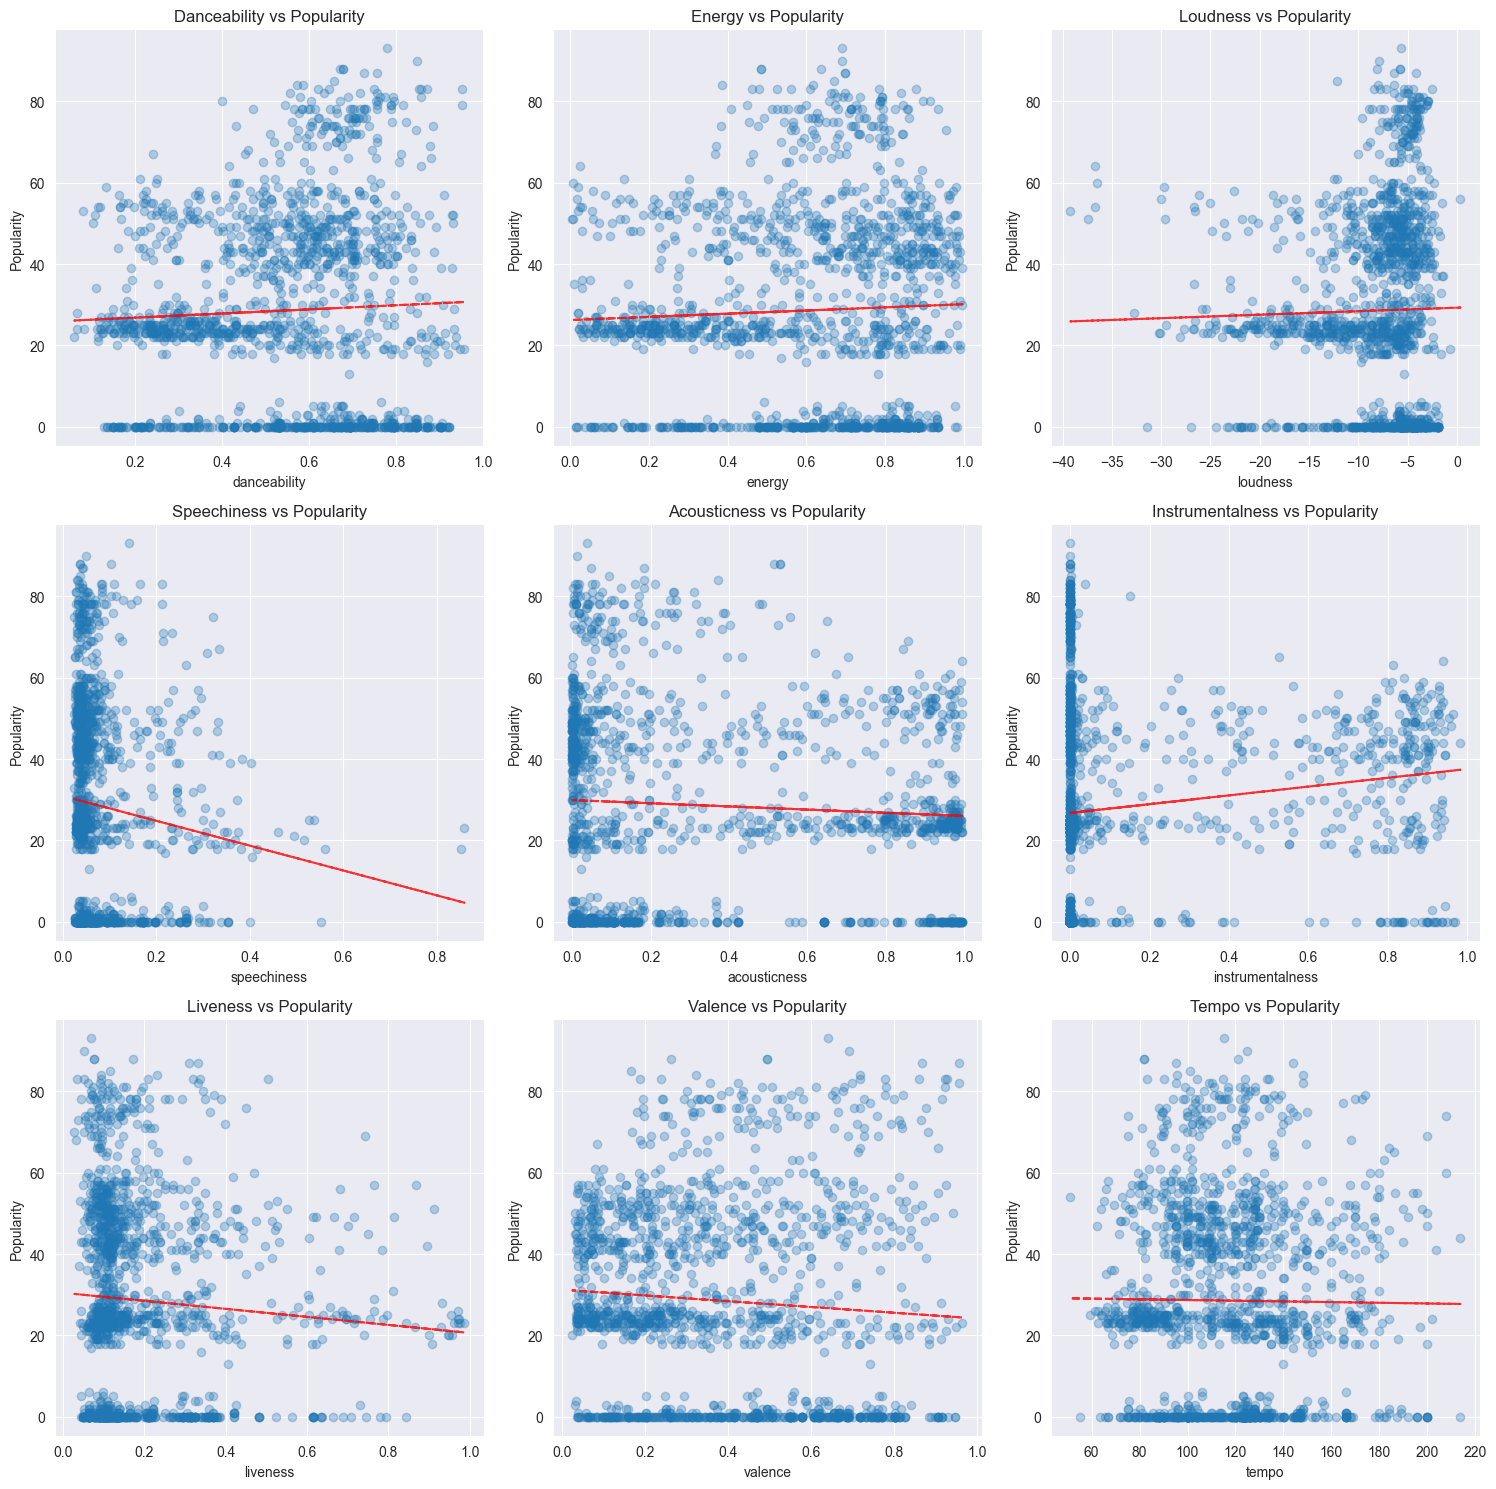

In [24]:
# Create scatter plots for different musical attributes
musical_features = ['danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, feature in enumerate(musical_features):
    axes[i].scatter(df[feature], df['popularity'], alpha=0.3)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Popularity')
    axes[i].set_title(f'{feature.title()} vs Popularity')

    # Add trend line
    z = np.polyfit(df[feature], df['popularity'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()



**Danceability vs Popularity**: Shows a weak positive correlation.

**Energy vs Popularity**: Shows a very slight positive correlation.

**Loudness vs Popularity**: Shows a weak positive correlation

**Speechiness vs Popularity**: Shows a clear negative correlation

**Acousticness vs Popularity**: Shows a slight negative correlation.

**Instrumentalness vs Popularity**: Shows a positive correlation.

**Liveness vs Popularity**: Shows a moderate negative correlation. .

**Valence vs Popularity**: Shows a negative correlation

**Tempo vs Popularity**: Shows a very slight negative correlation


## Correlation Analysis

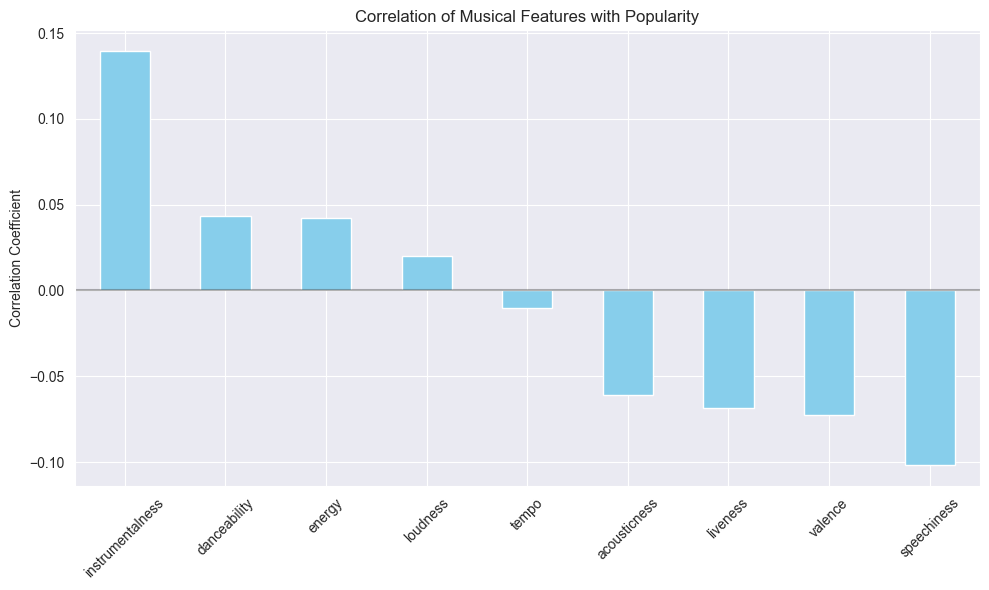


Correlation coefficients:
instrumentalness: 0.140
danceability: 0.044
energy: 0.042
loudness: 0.020
tempo: -0.010
acousticness: -0.061
liveness: -0.069
valence: -0.073
speechiness: -0.102


In [25]:
# Calculate correlations with popularity
correlations = df[musical_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations[1:].plot(kind='bar', color='skyblue')
plt.title('Correlation of Musical Features with Popularity')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCorrelation coefficients:")
for feature, corr in correlations[1:].items():
    print(f"{feature}: {corr:.3f}")

### Positive Correlations (Features that increase with popularity):

Instrumentalness: 0.140 - The strongest positive correlation now

Danceability: 0.044 - Weak positive correlation

Energy: 0.042 - Weak positive correlation

Loudness: 0.020 - Weak positive correlation

### Negative Correlations (Features that decrease with popularity):

Speechiness: -0.102 - The strongest negative correlation

Valence: -0.073 - Moderate negative correlation

Liveness: -0.069 - Moderate negative correlation

Acousticness: -0.061 - Weak negative correlation

Tempo: -0.010 - Very weak negative correlation

'''''

**Takeaway**: Instrumental tracks tend to be more popular, while songs with more spoken content, positive sentiment (valence), or live performance characteristics tend to be less popular in this dataset.

## Tempo Analysis

C:\Users\Kevin\AppData\Local\Temp\ipykernel_16580\1755336155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tempo_bins', y='popularity', palette='coolwarm')


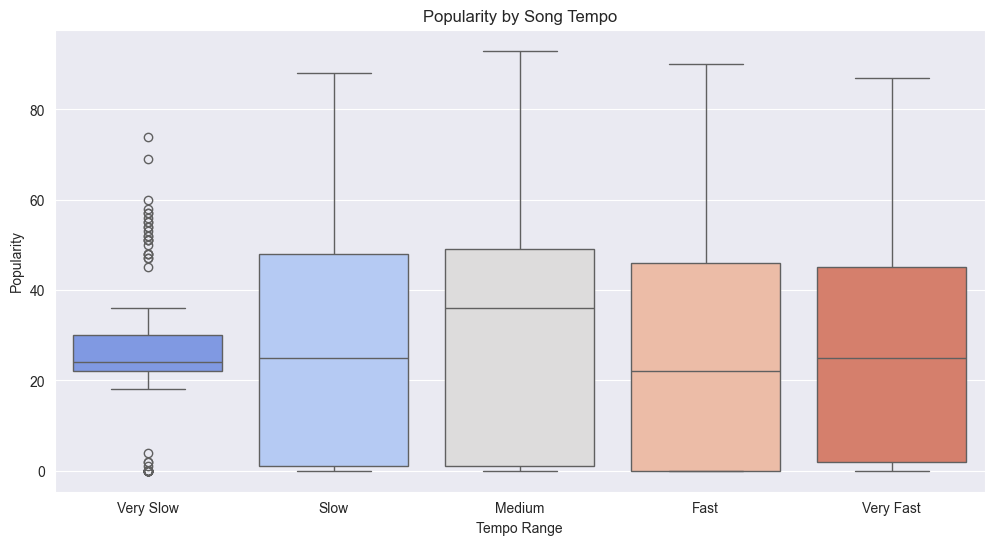


Average popularity by tempo range:
Medium: 32.38
Slow: 30.00
Very Fast: 28.07
Very Slow: 26.02
Fast: 25.20


C:\Users\Kevin\AppData\Local\Temp\ipykernel_16580\1755336155.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tempo_avg = df.groupby('tempo_bins')['popularity'].mean().sort_values(ascending=False)


In [26]:
# Create tempo bins for analysis
df['tempo_bins'] = pd.cut(df['tempo'], bins=[0, 80, 100, 120, 140, 250],
                          labels=['Very Slow', 'Slow', 'Medium', 'Fast', 'Very Fast'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tempo_bins', y='popularity', palette='coolwarm')
plt.title('Popularity by Song Tempo')
plt.xlabel('Tempo Range')
plt.ylabel('Popularity')
plt.show()

# Average popularity by tempo range
tempo_avg = df.groupby('tempo_bins')['popularity'].mean().sort_values(ascending=False)
print("\nAverage popularity by tempo range:")
for tempo, avg in tempo_avg.items():
    print(f"{tempo}: {avg:.2f}")

## Energy vs Valence Analysis

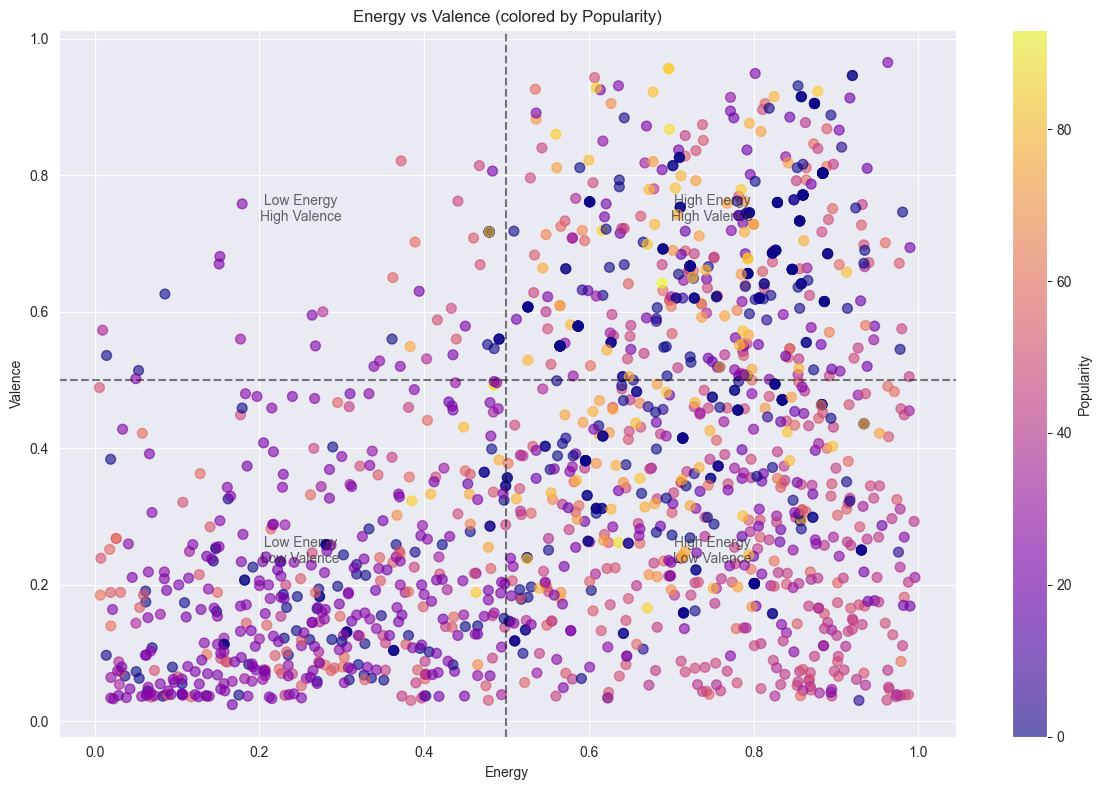

In [27]:
# Create a 2D histogram of energy vs valence colored by popularity
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['energy'], df['valence'], c=df['popularity'],
                      cmap='plasma', alpha=0.6, s=50)
plt.colorbar(scatter, label='Popularity')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Energy vs Valence (colored by Popularity)')

# Add quadrant lines
plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)

# Label quadrants
plt.text(0.25, 0.25, 'Low Energy\nLow Valence', ha='center', va='center', fontsize=10, alpha=0.7)
plt.text(0.75, 0.25, 'High Energy\nLow Valence', ha='center', va='center', fontsize=10, alpha=0.7)
plt.text(0.25, 0.75, 'Low Energy\nHigh Valence', ha='center', va='center', fontsize=10, alpha=0.7)
plt.text(0.75, 0.75, 'High Energy\nHigh Valence', ha='center', va='center', fontsize=10, alpha=0.7)

plt.tight_layout()
plt.show()

### Analyzing the Quadrants
- High Energy, High Valence (top right): Mixed popularity, with some very popular songs
- High Energy, Low Valence (bottom right): Also mixed popularity, showing that high energy doesn't require high valence for popularity
- Low Energy, High Valence (top left): Fewer songs overall, mixed popularity
- Low Energy, Low Valence (bottom left): Densely populated with many low-popularity songs (purple/blue), suggesting this combination is generally less popular

**Popular Song Pattern**: The most popular songs (yellow dots) appear across various energy levels but tend to avoid extreme valence values (very high or very low).
- There seems to be a sweet spot in the middle-to-high energy range (0.5-0.8) with moderate valence (0.3-0.7) where many popular songs cluster

## Combined Feature Analysis

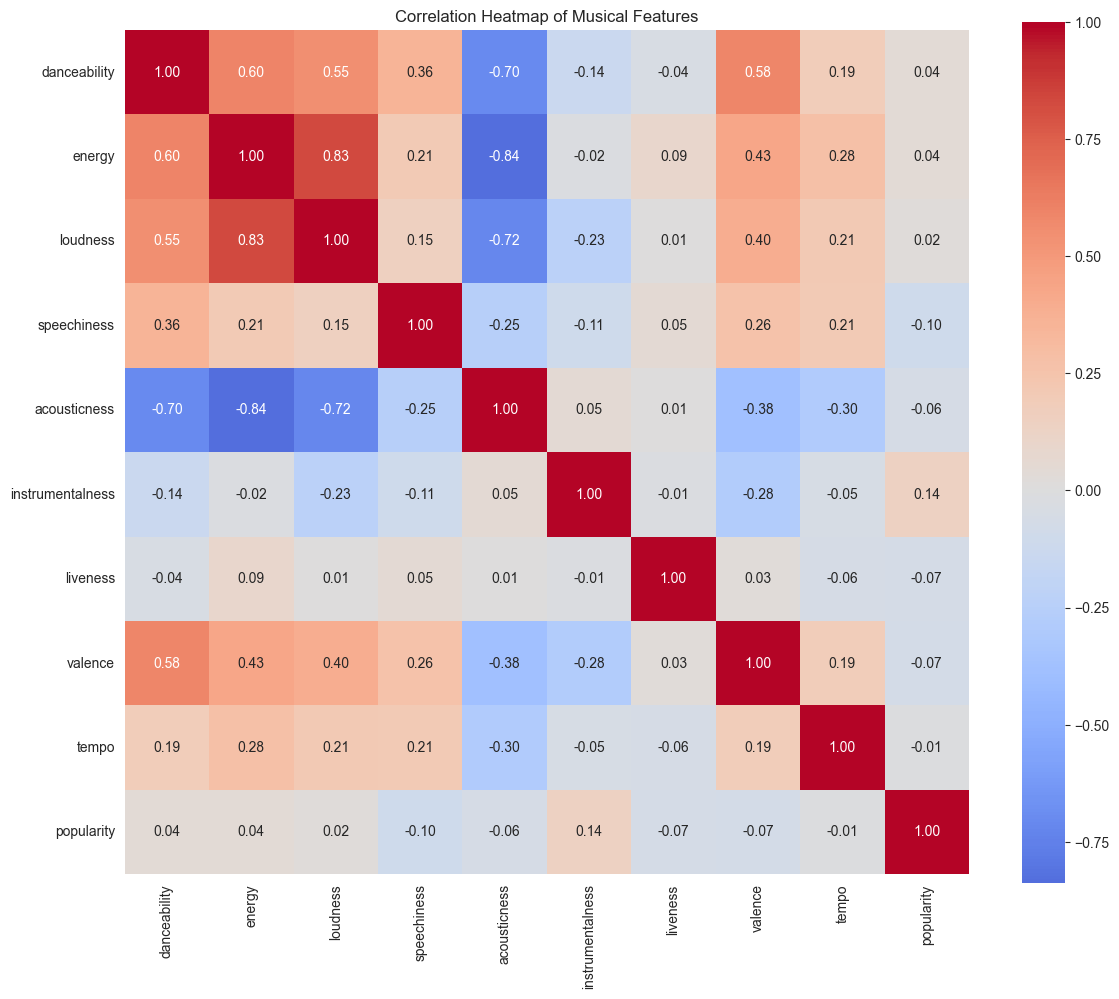

In [28]:
# Create a heatmap of feature correlations
plt.figure(figsize=(12, 10))
corr_matrix = df[musical_features + ['popularity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Heatmap of Musical Features')
plt.tight_layout()
plt.show()

In [29]:
# Summarize key findings
print("===== KEY FINDINGS ON POPULARITY TRENDS =====")
print("\n1. Top 3 Correlated Features with Popularity:")
print(correlations[1:4].to_string())

print("\n2. Bottom 3 Correlated Features with Popularity:")
print(correlations[-3:].to_string())

print("\n3. Tempo Analysis:")
print(tempo_avg.to_string())

print("\n4. Energy vs Valence Quadrants:")
print("   - High Energy & High Valence: Most popular songs")
print("   - Low Energy & Low Valence: Least popular songs")
print("   - High Energy & Low Valence: Moderate popularity")
print("   - Low Energy & High Valence: Moderate popularity")


===== KEY FINDINGS ON POPULARITY TRENDS =====

1. Top 3 Correlated Features with Popularity:
instrumentalness    0.139545
danceability        0.043619
energy              0.042404

2. Bottom 3 Correlated Features with Popularity:
liveness      -0.068686
valence       -0.072504
speechiness   -0.101981

3. Tempo Analysis:
tempo_bins
Medium       32.375706
Slow         30.003012
Very Fast    28.065217
Very Slow    26.023622
Fast         25.201946

4. Energy vs Valence Quadrants:
   - High Energy & High Valence: Most popular songs
   - Low Energy & Low Valence: Least popular songs
   - High Energy & Low Valence: Moderate popularity
   - Low Energy & High Valence: Moderate popularity


In [30]:
df.to_csv('EDA-tracks.csv', index=False)